In [1]:
import pennylane as qml
from pennylane import numpy as np 
import matplotlib.pyplot as plt

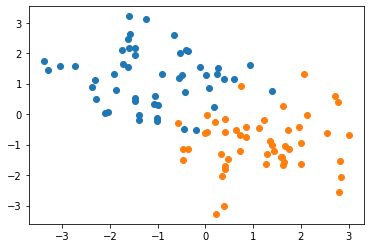

In [2]:

n_samples = 100
A = np.array([[np.random.normal(loc=-1), np.random.normal(loc=1)] for i in range(n_samples//2)]) 
B = np.array([[np.random.normal(loc=1), np.random.normal(loc=-1)] for i in range(n_samples//2)]) 

plt.scatter(A[:,0], A[:,1])
plt.scatter(B[:,0], B[:,1])
plt.show()



In [3]:
feature = np.concatenate([A, B], axis=0)
label = np.concatenate([-np.ones(n_samples // 2), np.ones(n_samples//2)], axis=0)
data = list(zip(feature, label))

In [10]:
def model(x, w):
    return np.arctan(x[0]*w[0] + x[1]*w[1] + w[2]) / (np.pi / 2)


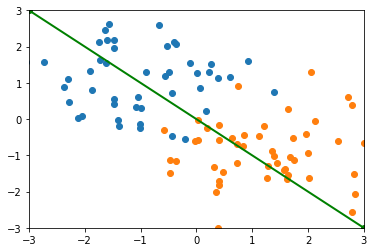

In [5]:
w = np.array([1, 1, 0], requires_grad = True)

def img_line(x, w):
    if w[1] == 0:
        w[1] = 0.0001
    return -(w[0] * x  + w[2]) / w[1]
    


def plot_model(w):
    x1, x2 = -3, 3
    plt.plot([x1, x2], [img_line(x1,w),img_line(x2,w)], 'go-', label='line 1', linewidth=2)
    plt.scatter(A[:,0], A[:,1])
    plt.scatter(B[:,0], B[:,1])
    plt.axis((-3,3,-3,3))
    plt.show()
    
plot_model(w)



In [6]:
def average_loss(w, data):
    losses = 0
    for x,y in data:
        losses += (model(x,w) - y) ** 2
    return losses/len(data)
        

In [7]:
average_loss([1,1,0], data)

tensor(1.8, requires_grad=True)

In [11]:
gradient_fn_w = qml.grad(average_loss, argnum=0)

epoch 100 loss 0.17266413909487535


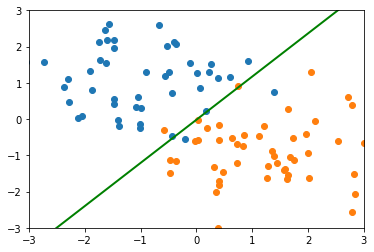

In [12]:
from IPython.display import clear_output
w = np.array([1, 1, 0], requires_grad = True)

lr = 0.1
for epoch in range(101):
    w = w - lr*gradient_fn_w(w,data)
    if epoch % 5 == 0:
        print("epoch", epoch, "loss", average_loss(w,data))
        plot_model(w)
        clear_output(wait=True)